# NMF BTM LDA CorEx MidTerm

# Pre Processing and Data Exploration

In [2]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tomotopy

In [4]:
pip install tmplot

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install git+https://github.com/markoarnauto/biterm.git

  Cloning https://github.com/markoarnauto/biterm.git to c:\users\kevin\appdata\local\temp\pip-req-build-gatqjf53
  Resolved https://github.com/markoarnauto/biterm.git to commit 130ac6f6f3ab165356f6c7f456bfbc0a9d6779ec
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



  Running command git clone --filter=blob:none --quiet https://github.com/markoarnauto/biterm.git 'C:\Users\kevin\AppData\Local\Temp\pip-req-build-gatqjf53'


  Created wheel for biterm: filename=biterm-0.2.0-py3-none-any.whl size=5756 sha256=862dab7264260aa5d8d5e21122ff71c4dcadb7cce48281880c5bff597e944179
  Stored in directory: C:\Users\kevin\AppData\Local\Temp\pip-ephem-wheel-cache-am4m8qnr\wheels\6a\09\9d\371a5c44126735eb675df53864ced6ce366eb9ff4c9340b89f
Successfully built biterm


In [95]:
pip install --user "tmtoolkit[recommended,lda,sklearn,gensim]"


  Using cached tmtoolkit-0.11.2-py3-none-any.whl (7.5 MB)
  Using cached lda-2.0.0-cp39-cp39-win_amd64.whl
  Using cached bidict-0.22.0-py3-none-any.whl (36 kB)
  Using cached loky-3.3.0-py3-none-any.whl (53 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pyLDAvis.gensim

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [137]:
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import numpy as np
import matplotlib.pyplot as plt 


In [8]:
kanye = pd.read_excel(r"C:\Users\kevin\Videos\Python Stuff\Data\Kanye Lyrics.xlsx")
kanye.head()

,Album,Song,Year,Run-time,Featured artist(s),Writer(s),Skit,Lyrics
0,The College Dropout,Intro (Skit),2004,00:19:00,NaN,Kanye West,Y,"Kanye, can I talk to you for a minute? Me and ..."
1,The College Dropout,We Don't Care,2004,03:59:00,NaN,"Kanye West, Miri Ben-Ari, Ross Vannelli",N,"[Intro]\nOh yeah, I've got the perfect song fo..."
2,The College Dropout,Graduation Day,2004,01:22:00,NaN,"Kanye West, John Stephens, Miri Ben-Ari",N,What in the fuck was that Kanye?!\nI told you ...
3,The College Dropout,All Falls Down,2004,03:43:00,Syleena Johnson,"Kanye West, Lauryn Hill",N,"[Hook: Syleena Johnson + Kanye West]\nOh, when..."
4,The College Dropout,I'll Fly Away,2004,01:09:00,NaN,Albert E. Brumley,N,One glad morning\nWhen this life is over\nI'll...


In [9]:
kanye['Lyrics'] = kanye['Lyrics'].astype(str)

In [10]:
# Remove the columns
lyrics = kanye.drop(columns=['Run-time', 'Featured artist(s)', 'Writer(s)','Skit'], axis=1)

# Print out the first rows of papers
lyrics.head()

,Album,Song,Year,Lyrics
0,The College Dropout,Intro (Skit),2004,"Kanye, can I talk to you for a minute? Me and ..."
1,The College Dropout,We Don't Care,2004,"[Intro]\nOh yeah, I've got the perfect song fo..."
2,The College Dropout,Graduation Day,2004,What in the fuck was that Kanye?!\nI told you ...
3,The College Dropout,All Falls Down,2004,"[Hook: Syleena Johnson + Kanye West]\nOh, when..."
4,The College Dropout,I'll Fly Away,2004,One glad morning\nWhen this life is over\nI'll...


In [11]:
lyrics["processed"] = lyrics['Lyrics'].map(lambda x: x.lower())
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub('\[.*?\]', '', x))# remove text inside square brackets


lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ain't", 'am not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("didn't", 'did not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("can't", 'can not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("there's", 'there is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("they'll", 'they will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("aren't", 'are not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("couldn't", 'could not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("doesn't", 'does not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("don't", 'do not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hadn't", 'had not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hasn't", 'has not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("haven't", 'have not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("he'd", 'he had', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("he'll", 'he will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("he's", 'he is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("i'd", 'i had', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("i'll", 'i will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("i'm", 'i am', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("i've", 'i have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("isn't", 'is not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("let's", 'let us', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("mightn't", 'might not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("mustn't", 'must not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shan't", 'shall not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("she'd", 'she would', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("she'll", 'she will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("she's", 'she is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shouldn't", 'should not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("they'd", 'they did', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("they're", 'they are', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("they've", 'they have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("we'd", 'we would', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("we're", 'we are', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("we've", 'we have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("weren't", 'were not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("what'll", 'what will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("what're", 'what are', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("what's", 'what is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("what've", 'what have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("where's", 'where is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("who'd", 'who would', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("who'll", 'who will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("who're", 'who are', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("who's", 'who is', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("who've", 'who have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("won't", 'will not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wouldn't", 'would not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("you'd", 'you would', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("you'll", 'you will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("you're", 'you are', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wasn't", 'was not', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("would've", 'would have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("should've", 'should have', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("could've", 'could have', x))

lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("mancause", 'man cause', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blackonblack", 'black on black', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gri'ame", 'grime', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lifeti'ame", 'lifetime', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ji'ammy", 'jimmy', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("outofbody", 'out of body', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("someti'ames", 'somtimes', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("si'ammons", 'simons', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ti'ames", 'times', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pi'amps", 'pimps', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hi'amself", 'himself', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ti'ame", 'time', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cri'ame", 'crime', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nnooo", 'no', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("floooooow", 'flow', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bloooooow", 'blow', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("yeahyeah", 'yeah yeah', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gon", 'going to', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gonna", 'going to', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lil", 'little', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("heavensent", 'heaven sent', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("somethin", 'something', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wonderin", 'wondering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dealin", 'something', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("jumpin", 'jumping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sharin", 'sharing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sittin", 'sitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nothin", 'nothing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("muthafuckin", 'mother fucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("niggas", 'nigga', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sellin", 'selling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hearin", 'hearing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("scratchin", 'scratching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bakin", 'baking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flickin", 'flicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("workin", 'working', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tellin", 'telling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("doin", 'doing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tryin", 'trying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gettin", 'getting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fuckin", 'fucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pushin", 'pushing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hollerin", 'hollering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("smokin", 'smoking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("writin", 'writing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("playin", 'playing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("livin", 'living', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spendin", 'spending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("askin", 'asking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("takin", 'taking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sayin", 'saying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("screamin", 'screaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sippin", 'sipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("visitin", 'visiting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("feelin", 'feeling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dreamin", 'dreaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("concealin", 'concealing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("losin", 'losing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lyin", 'lying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("coppin", 'copping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("retirin", 'retiring', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("watchin", 'watching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("puttin", 'putting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spittin", 'spitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lookin", 'looking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rollin", 'rolling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("talkin", 'talking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("grabbin", 'grabbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("callin", 'calling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("layin", 'laying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rockin", 'rocking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("messin", 'messing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dippin", 'dipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("movin", 'moving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bumpin", 'bumping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("listenin", 'listening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("havin", 'having', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("holdin", 'holding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rappin", 'rapping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("givin", 'giving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("usin", 'using', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("actin", 'acting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trippin", 'tripping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pullin", 'pulling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trickin", 'tricking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sendin", 'sending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bout", 'about', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("goin", 'going', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("throwin", 'throwing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("makin", 'making', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tryna", 'trying to', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("slidin", 'sliding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("risin", 'rising', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("warmin", 'warming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("grillin", 'grilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("performin", 'performing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("savin", 'saving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stayin", 'staying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("killin", 'killing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("poppin", 'popping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("soundin", 'sounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shoppin", 'shopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gassin", 'gassing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("leavin", 'leaving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("chasin", 'chasing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cryin", 'crying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("thinkin", 'thinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("approachin", 'approaching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bouncin", 'bouncing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wearin", 'wearing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("mornin", 'morning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("zonin", 'zoning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("breathin", 'breathing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gaspin", 'gasping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blazin", 'blazing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("kissin", 'kissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shinin", 'shining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("chillin", 'chilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("braggin", 'bragging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dyin", 'dying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wakin", 'waking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hangin", 'hanging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("floatin", 'floating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bitin", 'biting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("eatin", 'eating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("steppin", 'stepping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ballin", 'balling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("speakin", 'speaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hangin", 'hanging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("racin", 'racing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("surroundin", 'surrounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("happenin", 'happening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("owin", 'owing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("peekin", 'peeking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drillin", 'drilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("evenin", 'evening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dancin", 'dancing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lovin", 'loving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("complainin", 'complaining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("admittin", 'admitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("carryin", 'carrying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("notin", 'noting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("snorin", 'snoring', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("triflin", 'trifling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("payin", 'paying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("walkin", 'walking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("washin", 'washing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("moppin", 'mopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drivin", 'driving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stuntin", 'stunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flirtin", 'flirting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hurtin", 'hurting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pokin", 'poking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ridin", 'riding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gleamin", 'gleaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strugglin", 'struggling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fightin", 'fighting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bein", 'being', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("overdosin", 'overdosing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("baggin", 'bagging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("beepin", 'beeping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("arguin", 'arguing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("frontin", 'fronting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("guessin", 'guessing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("minin", 'mining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("timin", 'timing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sinkin", 'sinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("amazin", 'amazing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pimpin", 'pimping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nuttin", 'nutting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stealin", 'stealing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("smellin", 'smelling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("waitin", 'waiting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("panickin", 'panicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("comin", 'coming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("underachievin", 'underachieving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("weavin", 'weaving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pissin", 'pissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bullshittin", 'bullshit', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rhymin", 'rhyming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("keepin", 'keeping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("splurgin", 'splurging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flashin", 'flashing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("climbin", 'climbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shootin", 'shooting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("astoundin", 'astounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("representin", 'representing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("partyin", 'partying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fallin", 'falling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shootin", 'shooting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strokin", 'stroking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bubblin", 'bubbling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spillin", 'spilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pursuin", 'pursuing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bondin", 'bonding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tweakin", 'tweaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("yearnin", 'yearning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("expectin", 'expecting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gamblin", 'gambling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swaggin", 'swagging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bussin", 'bussing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rewardin", 'rewarding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blastin", 'blasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("coastin", 'coasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("passin", 'passing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clappin", 'clapping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wishin", 'wishing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drinkin", 'drinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blamin", 'blaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("defendin", 'defending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clubbin", 'clubbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("thuggin", 'thugging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hustlin", 'hustling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("checkin", 'checking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pretendin", 'pretending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("assessin", 'assessing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("beginnin", 'beginning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("endin", 'ending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("suckin", 'sucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("programmin", 'programming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("jammin", 'jamming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("textin", 'texting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dressin", 'dressing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("runnin", 'running', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fadin", 'fading', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spazzin", 'spazzing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ringin", 'ringing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buyin", 'buying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buryin", 'burying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("prayin", 'praying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("negotiatin", 'negotiating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("deliverin", 'delivering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("standin", 'standing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("menacin", 'menacing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("frightenin", 'frightening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bringin", 'bringing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strategizin", 'strategizing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bustin", 'busting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rubbin", 'rubbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("windin", 'winding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("questionin", 'questioning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("testin", 'testing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("plottin", 'plotting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("schemin", 'scheming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("findin", 'finding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drippin", 'dripping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cuttin", 'cutting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rebukin", 'rebuking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hopin", 'hoping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rulin", 'ruling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("winnin", 'winning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("seein", 'seeing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buzzin", 'buzzing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swingin", 'swinging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("offerin", 'offering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("yellin", 'yelling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stoppin", 'stopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hauntin", 'haunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("reachin", 'reaching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("huntin", 'hunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("searchin", 'searching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("vibin", 'vibing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buildin", 'building', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("weighin", 'weighing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("messagin", 'messaging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("repentin", 'repenting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wantin", 'wanting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pressin", 'pressing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("needin", 'needing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wrestlin", 'wrestling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("restin", 'resting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("plannin", 'planning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bootin", 'booting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tubin", 'tubing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tremblin", 'trembling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("brainstormin", 'brainstorming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("burnin", 'burning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("singin", 'singing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drainin", 'draining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("haulin", 'hauling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("startin", 'starting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("remindin", 'reminding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("exaggeratin", 'exaggerating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dissin", 'dissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flexin", 'flexing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trustin", 'trusting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clickin", 'clicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ceilin", 'ceiling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flexin", 'flexing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("countin", 'counting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("castin", 'casting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shakin", 'shaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("slippin", 'slipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("servin", 'serving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("settin", 'setting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tweetin", 'tweeting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("laughin", 'laughing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hoppin", 'hopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lastin", 'lasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cussin", 'cussing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("startin", 'starting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("darlin", 'darling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("facin", 'facing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("droppin", 'dropping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("revvin", 'revving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hoppin", 'hopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lastin", 'lasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("droppin", 'dropping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("catchin", 'catching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sinnin", 'sinning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fakin", 'faking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("scammin", 'scamming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hatin", 'hating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cleanin", 'cleaning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fixin", 'fixing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("postin", 'posting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("seasonin", 'seasoning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swimmin", 'swimming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("signin", 'signing', x))

lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("somethingg", 'something', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wonderingg", 'wondering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dealingg", 'something', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("jumpingg", 'jumping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sharingg", 'sharing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sittingg", 'sitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nothingg", 'nothing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("muthafuckingg", 'mother fucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("niggas", 'nigga', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sellingg", 'selling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hearingg", 'hearing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("scratchingg", 'scratching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bakingg", 'baking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flickingg", 'flicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("workingg", 'working', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tellingg", 'telling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("doingg", 'doing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tryingg", 'trying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gettingg", 'getting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fuckingg", 'fucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pushingg", 'pushing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("holleringg", 'hollering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("smokingg", 'smoking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("writingg", 'writing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("playingg", 'playing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("livingg", 'living', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spendingg", 'spending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("askingg", 'asking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("takingg", 'taking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sayingg", 'saying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("screamingg", 'screaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sippingg", 'sipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("visitingg", 'visiting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("feelingg", 'feeling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dreamingg", 'dreaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("concealingg", 'concealing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("losingg", 'losing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lyingg", 'lying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("coppingg", 'copping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("retiringg", 'retiring', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("watchingg", 'watching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("puttingg", 'putting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spittingg", 'spitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lookingg", 'looking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rollingg", 'rolling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("talkingg", 'talking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("grabbingg", 'grabbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("callingg", 'calling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("layingg", 'laying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rockingg", 'rocking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("messingg", 'messing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dippingg", 'dipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("movingg", 'moving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bumpingg", 'bumping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("listeningg", 'listening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("havingg", 'having', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("holdingg", 'holding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rappingg", 'rapping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("givingg", 'giving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("usingg", 'using', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("actingg", 'acting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trippingg", 'tripping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pullingg", 'pulling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trickingg", 'tricking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sendingg", 'sending', x))

lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("goingg", 'going', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("throwingg", 'throwing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("makingg", 'making', x))

lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("slidingg", 'sliding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("risingg", 'rising', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("warmingg", 'warming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("grillingg", 'grilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("performingg", 'performing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("savingg", 'saving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stayingg", 'staying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("killingg", 'killing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("poppingg", 'popping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("soundingg", 'sounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shoppingg", 'shopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gassingg", 'gassing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("leavingg", 'leaving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("chasingg", 'chasing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cryingg", 'crying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("thinkingg", 'thinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("approachingg", 'approaching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bouncingg", 'bouncing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wearingg", 'wearing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("morningg", 'morning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("zoningg", 'zoning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("breathingg", 'breathing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gaspingg", 'gasping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blazingg", 'blazing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("kissingg", 'kissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shiningg", 'shining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("chillingg", 'chilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("braggin", 'bragging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dyingg", 'dying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wakingg", 'waking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hangingg", 'hanging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("floatingg", 'floating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bitingg", 'biting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("eatingg", 'eating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("steppingg", 'stepping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ballingg", 'balling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("speakingg", 'speaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hangingg", 'hanging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("racingg", 'racing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("surroundingg", 'surrounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("happeningg", 'happening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("owingg", 'owing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("peekingg", 'peeking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drillingg", 'drilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("eveningg", 'evening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dancingg", 'dancing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lovingg", 'loving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("complainingg", 'complaining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("admittingg", 'admitting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("carryingg", 'carrying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("notingg", 'noting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("snoringg", 'snoring', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("triflingg", 'trifling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("payingg", 'paying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("walkingg", 'walking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("washingg", 'washing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("moppingg", 'mopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drivingg", 'driving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stuntingg", 'stunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flirtingg", 'flirting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hurtingg", 'hurting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pokingg", 'poking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ridingg", 'riding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gleamingg", 'gleaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strugglingg", 'struggling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fightingg", 'fighting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("beingg", 'being', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("overdosingg", 'overdosing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("baggingg", 'bagging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("beepingg", 'beeping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("arguingg", 'arguing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("frontingg", 'fronting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("guessingg", 'guessing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("miningg", 'mining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("timingg", 'timing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sinkingg", 'sinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("amazingg", 'amazing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pimpingg", 'pimping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nuttingg", 'nutting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stealingg", 'stealing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("smellingg", 'smelling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("waitingg", 'waiting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("panickingg", 'panicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("comingg", 'coming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("underachievingg", 'underachieving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("weavingg", 'weaving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pissingg", 'pissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bullshittingg", 'bullshit', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rhymingg", 'rhyming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("keepingg", 'keeping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("splurgingg", 'splurging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flashingg", 'flashing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("climbingg", 'climbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shootingg", 'shooting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("astoundingg", 'astounding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("representingg", 'representing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("partyingg", 'partying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fallingg", 'falling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shootingg", 'shooting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strokingg", 'stroking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bubblingg", 'bubbling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spillingg", 'spilling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pursuingg", 'pursuing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bondingg", 'bonding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tweakingg", 'tweaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("yearningg", 'yearning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("expectingg", 'expecting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("gamblingg", 'gambling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swaggingg", 'swagging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bussingg", 'bussing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rewardingg", 'rewarding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blastingg", 'blasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("coastingg", 'coasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("passingg", 'passing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clappingg", 'clapping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wishingg", 'wishing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drinkingg", 'drinking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("blamingg", 'blaming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("defendingg", 'defending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clubbingg", 'clubbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("thuggingg", 'thugging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hustlingg", 'hustling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("checkingg", 'checking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pretendingg", 'pretending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("assessingg", 'assessing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("beginningg", 'beginning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("endingg", 'ending', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("suckingg", 'sucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("programmingg", 'programming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("jammingg", 'jamming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("textingg", 'texting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dressingg", 'dressing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("runningg", 'running', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fadingg", 'fading', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("spazzingg", 'spazzing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ringingg", 'ringing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buyingg", 'buying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buryingg", 'burying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("prayingg", 'praying', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("negotiatingg", 'negotiating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("deliveringg", 'delivering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("standingg", 'standing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("menacingg", 'menacing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("frighteningg", 'frightening', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bringingg", 'bringing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("strategizingg", 'strategizing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bustingg", 'busting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rubbingg", 'rubbing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("windingg", 'winding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("questioningg", 'questioning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("testingg", 'testing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("plottingg", 'plotting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("schemingg", 'scheming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("findingg", 'finding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drippingg", 'dripping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cuttingg", 'cutting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rebukingg", 'rebuking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hopingg", 'hoping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("rulingg", 'ruling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("winningg", 'winning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("seeingg", 'seeing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buzzingg", 'buzzing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swingingg", 'swinging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("offeringg", 'offering', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("yellingg", 'yelling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("stoppingg", 'stopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hauntingg", 'haunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("reachingg", 'reaching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("huntingg", 'hunting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("searchingg", 'searching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("vibingg", 'vibing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("buildingg", 'building', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("weighingg", 'weighing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("messagingg", 'messaging', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("repentingg", 'repenting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wantingg", 'wanting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("pressingg", 'pressing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("needingg", 'needing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wrestlingg", 'wrestling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("restingg", 'resting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("planningg", 'planning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("bootingg", 'booting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tubingg", 'tubing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tremblingg", 'trembling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("brainstormingg", 'brainstorming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("burningg", 'burning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("singingg", 'singing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("drainingg", 'draining', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("haulingg", 'hauling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("startingg", 'starting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("remindingg", 'reminding', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("exaggeratingg", 'exaggerating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("dissingg", 'dissing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flexingg", 'flexing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("trustingg", 'trusting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("clickingg", 'clicking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("ceilingg", 'ceiling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("flexingg", 'flexing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("countingg", 'counting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("castingg", 'casting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("shakingg", 'shaking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("slippingg", 'slipping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("servingg", 'serving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("settingg", 'setting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("tweetingg", 'tweeting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("laughingg", 'laughing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hoppingg", 'hopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lastingg", 'lasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cussingg", 'cussing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("startingg", 'starting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("darlingg", 'darling', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("facingg", 'facing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("droppingg", 'dropping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("revvingg", 'revving', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hoppingg", 'hopping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("lastingg", 'lasting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("droppingg", 'dropping', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("catchingg", 'catching', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("sinningg", 'sinning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fakingg", 'faking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("scammingg", 'scamming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("hatingg", 'hating', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("cleaningg", 'cleaning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fixingg", 'fixing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("postingg", 'posting', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("seasoningg", 'seasoning', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("swimmingg", 'swimming', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("signingg", 'signing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("havingg", 'having', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("goingg", 'going', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("fuckingg", 'fucking', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("nothinggs", 'nothing', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("aabout", 'about', x))


lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("kanyes", 'kanye', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("itll", 'it will', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("wanna", 'want to', x))


lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("thenthen", 'then then', x))
lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub("backback", 'back back', x))

lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub('\n', ' ', x))# remove new line marker

<>:2: DeprecationWarning: invalid escape sequence \[
<>:2: DeprecationWarning: invalid escape sequence \[
C:\Users\kevin\AppData\Local\Temp\ipykernel_23692\1069017422.py:2: DeprecationWarning: invalid escape sequence \[
  lyrics["processed"] = lyrics['processed'].map(lambda x: re.sub('\[.*?\]', '', x))# remove text inside square brackets


In [12]:
data_text = lyrics[['processed', 'Song']]
data_text['index'] = data_text.index
documents = data_text

C:\Users\kevin\AppData\Local\Temp\ipykernel_23692\658964453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [13]:

my_stop_words = STOPWORDS.union(['go', 'like'])


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS.union(['like','tona', 'woah',
                                                                      'grrat','gotta', 'yeah', 'okay', 'gwaan']) and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

stemmer = SnowballStemmer('english')


In [14]:
doc_sample = documents[documents['index'] == 165].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['i', 'shift', 'the', 'tectonic', 'plates', 'of', 'the', 'game', 'if', 'i', 'lay', 'one', 'vocal', 'the', 'god', 'is', 'interstellar', 'while', 'you', 'fellas', 'remain', 'local', 'my', 'bars', 'is', 'like', 'the', 'pyramid', 'temples', 'of', 'pacal', 'votan', '(jesus)', 'as', 'sure', 'as', 'the', 'doj', 'confirmed', "ezekiel's", 'wheel', '(lord)', 'i', 'could', 'change', 'the', 'world', 'like', 'yakub', 'with', 'two', 'pieces', 'of', 'steel', 'my', 'sword', 'or', 'my', 'microphone,', 'i', 'swore', 'to', 'the', "christ's", 'throne', 'but', 'when', 'you', 'great,', 'they', 'want', 'to', 'say', 'you', 'took', 'an', 'l,', 'josé', 'castillo', '(jesus)', 'i', 'am', 'in', 'the', 'fight', 'here,', 'fight', 'here,', 'for', 'what', 'seemed', 'like', 'lightyears', '(lord)', 'my', 'rugged', 'cross', 'and', 'thorny', 'crowns', 'squeeze', 'out', 'christ', 'tears', 'thirty', 'pieces', 'of', 'silver', 'clout,', 'my', 'pierre', 'price', 'tier', "it's", 'a', 'war', 'outside,', "it's

['shift', 'tecton', 'plat', 'game', 'vocal', 'interstellar', 'fella', 'remain', 'local', 'bar', 'pyramid', 'templ', 'pacal', 'votan', 'jesus', 'sure', 'confirm', 'ezekiel', 'wheel', 'lord', 'chang', 'world', 'yakub', 'piec', 'steel', 'sword', 'microphon', 'swear', 'christ', 'throne', 'great', 'want', 'take', 'josé', 'castillo', 'jesus', 'fight', 'fight', 'lightyear', 'lord', 'rug', 'cross', 'thorni', 'crown', 'squeez', 'christ', 'tear', 'thirti', 'piec', 'silver', 'clout', 'pierr', 'price', 'tier', 'outsid', 'outsid', 'jesus', 'day', 'sodom', 'gomorrah', 'outsid', 'lord', 'tell', 'know', 'need', 'jesus', 'lord', 'donni', 'money', 'forget', 'need', 'mom', 'jesus', 'thirti', 'look', 'street', 'lord', 'trophi', 'bear', 'rock', 'crown', 'knock', 'holi', 'water', 'turn', 'brown', 'jesus', 'donni', 'loyal', 'differ', 'soil', 'lord', 'flame', 'water', 'boil', 'rap', 'call', 'stop', 'happi', 'pop', 'jesus', 'hous', 'look', 'cop', 'lord', 'devil', 'jesus', 'christ', 'stop', 'basic', 'block', 'k

In [15]:
documents

,processed,index
0,"kanye, can i talk to you for a minute? me and ...",0
1,"oh yeah, i have got the perfect song for the ...",1
2,what in the fuck was that kanye?! i told you t...,2
3,"oh, when it all, it all falls down yeah, this...",3
4,one glad morning when this life is over i will...,4
...,...,...
173,tell me if you know someone that needs (jesus...,173
174,"okay, now they got me want to rap again heale...",174
175,"okay, now they got me want to rap again heale...",175
176,take what you want take everything take what ...,176


In [16]:
processed_docs = documents['processed'].map(preprocess)


In [17]:
processed_docs

0      [kany, talk, minut, faculti, member, wonder, l...
1      [perfect, song, kid, sing, peopl, drug, stack,...
2      [fuck, kany, tell, shit, kid, mother, fuck, gr...
3      [fall, real, babi, tell, fall, town, stand, fa...
4      [glad, morn, life, away, land, shall, away, aw...
                             ...                        
173    [tell, know, need, jesus, lord, thing, tell, k...
174    [want, heal, wind, stab, type, play, joke, hid...
175    [want, heal, wind, stab, type, play, joke, hid...
176    [want, want, want, better, chang, number, expl...
177    [spirit, aliv, spirit, aliv, aliv, lord, spiri...
Name: processed, Length: 178, dtype: object

In [18]:
testf = pd.DataFrame(processed_docs)

In [19]:
testf

,processed
0,"[kany, talk, minut, faculti, member, wonder, l..."
1,"[perfect, song, kid, sing, peopl, drug, stack,..."
2,"[fuck, kany, tell, shit, kid, mother, fuck, gr..."
3,"[fall, real, babi, tell, fall, town, stand, fa..."
4,"[glad, morn, life, away, land, shall, away, aw..."
...,...
173,"[tell, know, need, jesus, lord, thing, tell, k..."
174,"[want, heal, wind, stab, type, play, joke, hid..."
175,"[want, heal, wind, stab, type, play, joke, hid..."
176,"[want, want, want, better, chang, number, expl..."


In [20]:
dfe = testf.processed.explode().to_frame().reset_index(drop=True)

dfe

,processed
0,kany
1,talk
2,minut
3,faculti
4,member
...,...
29714,life
29715,hand
29716,stress
29717,pray


In [21]:
# groupby the values in the column, get the count and sort
dfg = dfe.groupby('processed').processed.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(30).reset_index(drop=True)

In [22]:
dfg

,processed,count
0,know,685
1,go,535
2,want,351
3,nigga,344
4,tell,338
5,love,332
6,feel,291
7,need,277
8,come,256
9,right,234


<AxesSubplot:title={'center':'Lyrics Vocab Count'}, xlabel='processed'>

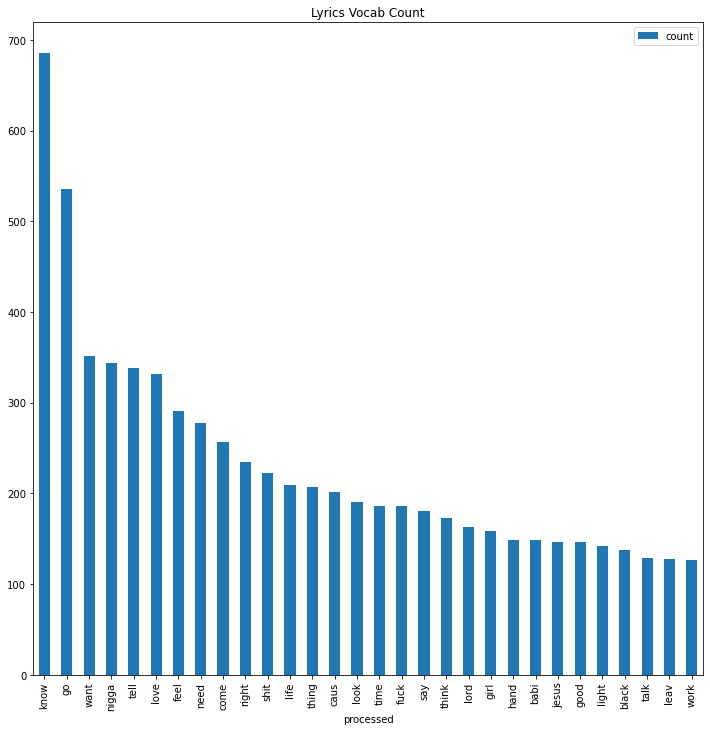

In [190]:
from matplotlib.pyplot import figure



# plot the dataframe
dfg.plot.bar(x='processed', figsize=(12,12), title='Lyrics Vocab Count')


# LDA

In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(processed_docs)

# Create Corpus
texts = processed_docs# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


In [25]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"love" + 0.022*"know" + 0.013*"feel" + 0.013*"want" + 0.012*"nigga" + '
  '0.011*"go" + 0.010*"tell" + 0.008*"come" + 0.007*"move" + 0.006*"time"'),
 (1,
  '0.024*"know" + 0.022*"go" + 0.012*"black" + 0.011*"want" + 0.008*"nigga" + '
  '0.008*"thing" + 0.008*"shit" + 0.008*"tell" + 0.008*"come" + 0.007*"girl"'),
 (2,
  '0.028*"feel" + 0.021*"forward" + 0.020*"amaz" + 0.019*"move" + '
  '0.012*"jesus" + 0.011*"babi" + 0.011*"deep" + 0.011*"need" + 0.011*"fade" + '
  '0.009*"insid"'),
 (3,
  '0.023*"know" + 0.015*"love" + 0.015*"go" + 0.014*"nigga" + 0.011*"need" + '
  '0.011*"hand" + 0.010*"want" + 0.010*"caus" + 0.009*"shit" + 0.009*"come"'),
 (4,
  '0.026*"donda" + 0.013*"know" + 0.011*"amaz" + 0.010*"light" + 0.009*"night" '
  '+ 0.009*"tell" + 0.008*"want" + 0.008*"brother" + 0.008*"life" + '
  '0.007*"babi"'),
 (5,
  '0.018*"know" + 0.013*"tell" + 0.013*"break" + 0.012*"need" + 0.012*"go" + '
  '0.011*"feel" + 0.010*"right" + 0.010*"nigga" + 0.009*"stop" + '
  '0.009*

In [26]:
#-18.63, 675

In [139]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.787963618963176

Coherence Score:  [0.2607422550814923, 0.29427631633302653, 0.2081204306785748, 0.2489242447013466, 0.28171506909241906, 0.25447602460362817, 0.2517955985391676, 0.2712157438930409, 0.23243803743782293, 0.23458870491526138]


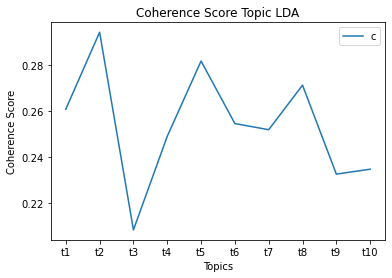

In [193]:
topicsname= []

for i in range(1,num_topics+1):
    topicsname.append("t{0}".format(i))
topicsname

plt.plot(topicsname, coherence_lda)
plt.title('Coherence Score Topic LDA')
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence values"), loc='best')
plt.show()

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\kevin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.020359 -0.017346       1        1  23.184514
9     -0.020986 -0.008583       2        1  16.450237
5     -0.014658 -0.005917       3        1  13.187371
1     -0.022308 -0.013089       4        1   9.557231
7     -0.014044 -0.006446       5        1   9.233205
0      0.023870 -0.021656       6        1   6.731915
6     -0.012396 -0.015241       7        1   6.503529
4     -0.003793  0.071856       8        1   6.451751
8     -0.016384  0.017552       9        1   5.296801
2      0.101058 -0.001132      10        1   3.403446, topic_info=         Term        Freq       Total Category  logprob  loglift
59       feel  239.000000  239.000000  Default  30.0000  30.0000
2172    donda   61.000000   61.000000  Default  29.0000  29.0000
660   forward   52.000000   52.000000  Default  28.0000  28.0000
877      move   71.000000   71.000000  Default  27.0000  27.0000
1418     amaz   50.000000   50.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
35       caus    4.322227  183.956531  Topic10  -5.4554  -0.3705
164     right    4.359358  208.624084  Topic10  -5.4468  -0.4878
2931     lord    4.006692  151.033514  Topic10  -5.5312  -0.2492
30      break    3.843654   95.091562  Topic10  -5.5727   0.1720
284      away    3.752592   83.086245  Topic10  -5.5967   0.2829

[751 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3911      5  0.590625  abraham
745       4  0.624075    acura
178       1  0.334160   afford
178       3  0.111387   afford
178       4  0.111387   afford
...     ...       ...      ...
2602      2  0.245371     yell
2602      6  0.245371     yell
2602      8  0.245371     yell
1031      6  0.345341     zeta
1031      7  0.345341     zeta

[2018 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 6, 2, 8, 1, 7, 5, 9, 3])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

In [30]:
testx= testf["processed"].str.join(" ")


In [31]:
testx

0      kany talk minut faculti member wonder littl be...
1      perfect song kid sing peopl drug stack money h...
2      fuck kany tell shit kid mother fuck graduat ti...
3      fall real babi tell fall town stand fall south...
4      glad morn life away land shall away away glori...
                             ...                        
173    tell know need jesus lord thing tell know need...
174    want heal wind stab type play joke hide hand t...
175    want heal wind stab type play joke hide hand t...
176    want want want better chang number explain vio...
177    spirit aliv spirit aliv aliv lord spirit life ...
Name: processed, Length: 178, dtype: object

In [32]:
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=2, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(testx)

In [33]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [34]:
X.shape

(178, 1974)

In [35]:
nmf_features.shape

(178, 10)

In [36]:
model.components_.shape

(10, 1974)

In [37]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaliyah,abandon,abl,abort,accept,accid,act,action,actual,adam,...,year,yeezi,yeezus,yell,yesterday,yoga,young,youth,zombi,zone
0,0.011841,0.035227,0.000000,0.004972,0.000000,0.030003,0.041442,0.000562,0.050242,0.004328,...,0.053974,0.000000,0.000000,0.003511,0.006126,0.003771,0.060875,0.000000,0.000000,0.000243
1,0.000000,0.000000,0.018931,0.009162,0.013142,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018390,0.000000,0.002206,0.000135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.002367,0.023821,0.000000,0.000000,0.060137,0.000000,0.000000,0.002048,0.000000,0.000000,...,0.000000,0.079813,0.000000,0.005683,0.000000,0.000478,0.014493,0.000000,0.000000,0.007202
3,0.000000,0.000000,0.000000,0.000000,0.001263,0.003066,0.000226,0.000000,0.007861,0.000000,...,0.000000,0.000948,0.002811,0.000844,0.008117,0.002968,0.006155,0.042332,0.002422,0.006569
4,0.000000,0.000000,0.006810,0.000000,0.000000,0.000000,0.000000,0.000000,0.003350,0.000000,...,0.120974,0.000000,0.000000,0.010069,0.000000,0.000290,0.005752,0.000000,0.000000,0.000000
5,0.000908,0.004924,0.006673,0.000000,0.019951,0.000499,0.000000,0.000000,0.003852,0.000811,...,0.002707,0.025106,0.000000,0.000000,0.002158,0.005011,0.000000,0.000000,0.000000,0.000000
6,0.003211,0.000000,0.004665,0.004444,0.002799,0.000000,0.008402,0.000000,0.000046,0.000000,...,0.002587,0.027621,0.023771,0.000000,0.001945,0.000000,0.023097,0.000000,0.016441,0.027004
7,0.000000,0.002217,0.000000,0.000000,0.010834,0.000000,0.016564,0.000000,0.000000,0.003595,...,0.001641,0.000769,0.020540,0.012735,0.000000,0.000000,0.014139,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037528,0.000476,0.000000,...,0.000000,0.026197,0.000000,0.003835,0.009348,0.001065,0.010848,0.006181,0.002381,0.078921
9,0.000000,0.000000,0.015090,0.003654,0.000000,0.015184,0.015197,0.053019,0.000000,0.025828,...,0.061390,0.078370,0.003992,0.000000,0.001784,0.001711,0.007411,0.001648,0.000000,0.000000


In [38]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
know      1.000725
thing     0.547900
tell      0.329970
talk      0.288697
light     0.279088
night     0.270828
breath    0.245312
leav      0.239165
want      0.233918
mean      0.227286
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
jesus      0.820258
lord       0.742924
water      0.139656
christ     0.136531
need       0.128264
confess    0.120563
save       0.117534
tongu      0.111865
knee       0.111050
shall      0.102508
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
love     0.967217
feel     0.384798
rude     0.182210
know     0.172658
lock     0.169781
lose     0.159460
ooooh    0.152704
want     0.135945
nigga    0.110881
free     0.110717
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
play        0.414196
type        0.377186
bruk        0.358939
nigga       0.326517
real        0.305735
shit        0.275954
want        0.270925
inves

#### Something I was trying out but dont think it worked :/

In [202]:
# Compute Perplexity
#print('\nPerplexity: ', model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_nmf = CoherenceModel(model=model, texts=processed_docs, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)

#### Me getting confused about how to implement gensim nmf

In [39]:
#from gensim.corpora import Dictionary

#from gensim.models import CoherenceModel, TfidfModel

#dct = Dictionary(processed_docs)  # fit dictionary
#corpus2 =  [dct.doc2bow(line) for line in testf["processed"]]

#tfidf = TfidfModel(dictionary= dct)

In [40]:
#train_corpus = dct.doc2bow(testx)

#cpus = list(tfidf[dct])

TypeError: cannot unpack non-iterable int object

In [ ]:
#from gensim.models import Nmf

#nmf = Nmf(
 #   corpus= cpus,
 #   num_topics=10,
 #   id2word=dct,
 #   normalize = True
   
#)

In [ ]:
#W = nmf.get_topics().T
#nmf.show_topics(10)


In [ ]:
#dct


# BTM

In [60]:
import bitermplus as btm

texts = testx.str.strip().tolist()

# Vectorizing documents, obtaining full vocabulary and biterms
# Internally, btm.get_words_freqs uses CountVectorizer from sklearn
# You can pass any of its arguments to btm.get_words_freqs
# For example, you can remove stop words:
stop_words = ["word1", "word2", "word3"]
X, vocabulary, vocab_dict = btm.get_words_freqs(texts, stop_words=stop_words)
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
biterms = btm.get_biterms(docs_vec)

# Initializing and running model
model = btm.BTM(
    X, vocabulary, T=10, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=100)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.67it/s]


In [61]:
p_zd = model.transform(docs_vec)


100%|██████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 8498.81it/s]


In [66]:
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)
# or
perplexity = model.perplexity_
coherence = model.coherence_

In [67]:
perplexity

1144.934587166029

In [191]:
coherence

array([-217.48745972, -200.53250299, -319.83279898, -160.48007465,
       -244.40587119, -177.6443756 , -191.111335  , -212.2674785 ,
       -170.33900393, -163.20361517])

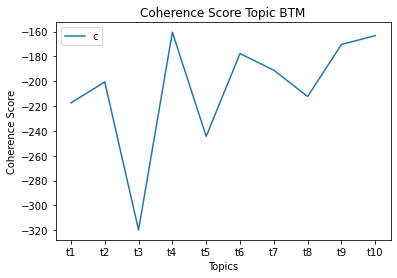

In [192]:
plt.plot(topicsname, coherence)
plt.title('Coherence Score Topic BTM')
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence values"), loc='best')
plt.show()

In [64]:
import tmplot as tmp

# Run the interactive report interface/ this didnt seem to work :/
tmp.report(model=model, docs=texts)

In [59]:
testx

0      kany talk minut faculti member wonder littl be...
1      perfect song kid sing peopl drug stack money h...
2      fuck kany tell shit kid mother fuck graduat ti...
3      fall real babi tell fall town stand fall south...
4      glad morn life away land shall away away glori...
                             ...                        
173    tell know need jesus lord thing tell know need...
174    want heal wind stab type play joke hide hand t...
175    want heal wind stab type play joke hide hand t...
176    want want want better chang number explain vio...
177    spirit aliv spirit aliv aliv lord spirit life ...
Name: processed, Length: 178, dtype: object

In [105]:
components_nmf= pd.DataFrame(model.matrix_topics_words_, columns=vocabulary)

In [106]:
components_nmf

,aaaaahhh,aaaah,aaliyah,aaron,abandon,abbi,abercrombi,abernathi,abid,abl,...,zebra,zeitgeist,zeta,zion,zombi,zone,zulu,zöld,ándale,ölén
0,9.852587e-08,9.852587e-08,2.168554e-04,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,...,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,9.852587e-08,1.577399e-04,2.168554e-04,2.070028e-04,9.852587e-08,1.971503e-04
1,1.560204e-07,1.560204e-07,1.560204e-07,1.560204e-07,1.560204e-07,1.560204e-07,2.965947e-04,1.560204e-07,1.560204e-07,9.050742e-04,...,1.560204e-07,1.560204e-07,1.560204e-07,1.560204e-07,2.809927e-04,8.894722e-04,1.560204e-07,1.560204e-07,1.560204e-07,1.560204e-07
2,2.438537e-07,2.438537e-07,8.293465e-04,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,...,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07,2.438537e-07
3,1.001260e-07,9.021350e-05,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,2.804528e-04,1.001260e-07,1.001260e-07,...,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07,1.001260e-07
4,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07,3.686936e-03,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07,...,1.542586e-07,9.270944e-05,1.542586e-07,4.320785e-04,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07,1.542586e-07
5,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,7.035478e-05,1.170629e-07,1.170629e-07,1.908242e-03,...,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,1.170629e-07,7.035478e-05,1.170629e-07,1.170629e-07,1.170629e-07
6,1.239247e-07,1.239247e-07,1.239247e-07,3.471130e-04,1.239247e-07,3.471130e-04,1.239247e-07,1.239247e-07,1.239247e-07,1.239247e-07,...,3.471130e-04,2.727582e-04,1.239247e-07,1.239247e-07,1.239247e-07,3.197380e-03,1.239247e-07,1.239247e-07,1.239247e-07,1.239247e-07
7,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,...,1.302521e-07,1.302521e-07,1.094248e-03,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07,1.302521e-07
8,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,2.983082e-04,1.065006e-07,...,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07,4.048088e-04,1.214213e-03,1.065006e-07,1.065006e-07,1.065006e-07,1.065006e-07
9,1.145919e-07,2.178392e-04,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,...,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,1.145919e-07,7.793396e-04,1.145919e-07,1.145919e-07,6.418293e-04,1.145919e-07


In [108]:
for topic in range(components_nmf.shape[0]):
    tmp1 = components_nmf.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp1.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
go       0.041292
know     0.039470
right    0.030159
tell     0.029804
want     0.018030
need     0.016612
thing    0.013705
feel     0.013469
caus     0.012099
homi     0.011774
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
go         0.049240
feel       0.036212
guess      0.023778
jail       0.014572
tonight    0.013746
deep       0.013090
free       0.012841
know       0.012669
come       0.011436
tell       0.010890
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
lord       0.057111
move       0.054233
forward    0.046893
power      0.026532
need       0.025263
sing       0.024605
spirit     0.022654
kid        0.021557
come       0.019070
light      0.018411
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
jesus    0.016761
feel     0.016080
life     0.015430
tell     0.014799
know     0.013858
look     0.013057
love     0.011645
need     0.01046

In [69]:
testx

0      kany talk minut faculti member wonder littl be...
1      perfect song kid sing peopl drug stack money h...
2      fuck kany tell shit kid mother fuck graduat ti...
3      fall real babi tell fall town stand fall south...
4      glad morn life away land shall away away glori...
                             ...                        
173    tell know need jesus lord thing tell know need...
174    want heal wind stab type play joke hide hand t...
175    want heal wind stab type play joke hide hand t...
176    want want want better chang number explain vio...
177    spirit aliv spirit aliv aliv lord spirit life ...
Name: processed, Length: 178, dtype: object

In [73]:
testf

,processed
0,"[kany, talk, minut, faculti, member, wonder, l..."
1,"[perfect, song, kid, sing, peopl, drug, stack,..."
2,"[fuck, kany, tell, shit, kid, mother, fuck, gr..."
3,"[fall, real, babi, tell, fall, town, stand, fa..."
4,"[glad, morn, life, away, land, shall, away, aw..."
...,...
173,"[tell, know, need, jesus, lord, thing, tell, k..."
174,"[want, heal, wind, stab, type, play, joke, hid..."
175,"[want, heal, wind, stab, type, play, joke, hid..."
176,"[want, want, want, better, chang, number, expl..."


# CorEX

In [142]:
import numpy as np
import scipy.sparse as ss
from corextopic import corextopic as ct
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english')
doc_word1 = vectorizer.fit_transform(testx)
doc_word1 = ss.csr_matrix(doc_word1)

doc_word1.shape # n_docs x m_words

(178, 4379)

In [155]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [170]:

topic_model = ct.Corex(n_hidden=20, words=words, max_iter=100, verbose=False, seed=1)
topic_model.fit(doc_word1, words=words);

In [171]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: self, time, demon, hospit, thank, grandfath, practic, curv, weekend, larri
1: claim, magic, sweat, loui, champagn, chick, toni, writer, definit, project
2: court, instagram, heavi, clear, histori, lawyer, spoil, scandal, racism, strobe
3: person, grass, tough, young, week, wind, seven, couldn, legend, mental
4: realiti, grand, drum, pray, spray, quiet, soda, studio, communiti, bougi
5: brown, buzz, lexus, stunt, fail, pride, sale, dame, emot, apart
6: look, guess, shit, come, caus, damn, girl, say, break, piec
7: flow, album, wors, hova, calm, truth, plus, pocket, high, lack
8: colleg, million, cop, track, year, dollar, favorit, releas, famous, paper
9: real, face, black, nigga, pick, hous, kill, treat, cover, peopl
10: thing, team, kick, famili, smoke, street, away, check, help, product
11: tri, block, stay, rememb, funni, momma, catch, argu, beat, money
12: laugh, fast, hand, mind, twist, thug, stop, fool, round, hammer
13: hear, play, folk, coat, hope, dead, feel, older, swear, r

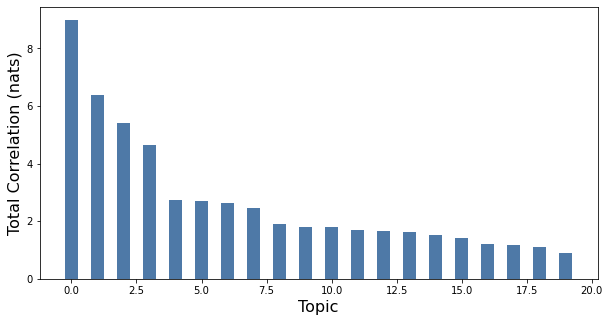

In [175]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [198]:
# Anchor one word to the first topic
anchor_words = [['jesus','hallelujah','heaven','church']]

In [199]:
# Anchor the word 'jesus' to the first topic
anchored_topic_model = ct.Corex(n_hidden=10, seed=2)
anchored_topic_model.fit(doc_word1, words=words, anchors=anchor_words, anchor_strength=6);

In [200]:
#This anchors the single word "jesus" to the first topic.

topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=0))
print('0: ' + ', '.join(topic_words))

0: jesus, heaven, church, hallelujah, pray, leav, stand, turn, thing, write


In [201]:
# Print all topics from the CorEx topic model
a_topics = anchored_topic_model.get_topics()
for n,topic in enumerate(a_topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: jesus, heaven, church, hallelujah, pray, leav, stand, turn, thing, write
1: dead, come, year, look, father, peopl, rhyme, pimp, extra, cook
2: lord, longer, pain, grand, grass, bless, count, type, suck, titti
3: finish, parti, crack, bus, centuri, feel, text, messag, fast, diamond
4: nigga, sound, fuck, know, key, hat, wind, ask, want, shit
5: say, time, black, sign, thank, doubl, feet, millionair, buy, blood
6: pressur, smell, beat, soft, queen, fella, pictur, food, deal, pink
7: person, dawg, best, real, mission, think, watch, smile, boy, jacob
8: realiti, older, prison, nerv, heart, chicago, caus, fact, stori, water
9: talk, need, michael, chanc, jackson, shoulder, support, jump, remind, fruit
